<div style="background-color: aliceblue; padding: 60px;">
    <h2 style="color: royalblue; text-align: center;">Securing Healthcare Systems: A Machine Learning-based Fraud Detection Approach</h2>
    <br>
    <img src="https://media.licdn.com/dms/image/C4D12AQFvGaB5W5T44w/article-cover_image-shrink_720_1280/0/1559073643154?e=1712188800&v=beta&t=SydyS8kaS0A4KxC7V-LZeeYnWEltXruSWcMEFyNLnOA" alt="Healthcare Fraud Detection Image" style="width: 470px;">
    <br>
    <p style ="color: steelblue;"> The dynamic realm of healthcare, the pressing issue of fraudulent activities, particularly within insurance claims submitted by healthcare providers, demands inventive solutions. This study delves into the challenge of healthcare fraud in the United States, where over the past two decades, the average individual and family insurance premiums have witnessed substantial increases. Conventional manual methods for fraud detection are proving to be inefficient and time-consuming, necessitating a shift in our approach. The project envisions a healthcare system fortified by a proactive and sustainable fraud detection strategy, contributing to elevated service quality and cost-effectiveness. Through the application of data mining and exploratory data analysis (EDA), we aim to uncover distinctive patterns and anomalies within the data. The model at the core of our investigation concentrates on binary classification tasks, harnessing advanced machine learning techniques such as logistic regression, KNN, decision trees, random forest, and one-class SVM, in conjunction with ensemble methods. This research not only strives to effectively detect potential frauds but also endeavors to pinpoint the key features influencing such detections, providing invaluable insights for a more secure and efficient healthcare ecosystem. Ultimately, this study seeks to chart the course for a resilient, technologically advanced healthcare system that is better equipped to ensure the well-being of both providers and beneficiaries. </p>


</div>

In [1]:
#Steps carried 

## Import necessary libraries

In [1]:
#import data manipulation libraries
import numpy as np
import pandas as pd 

#import visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as px
import missingno as msno

#import category_encoders library
from category_encoders import TargetEncoder

#import imblearn library
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#import sklearn libraries 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.decomposition import PCA

#model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#import statsmodel library 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#display all columns
pd.set_option('display.max_columns', None)

#ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
inpatient_data = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [4]:
outpatient_data = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [5]:
beneficiary_data = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [6]:
mapping_data = pd.read_csv('Train-1542865627584.csv')
mapping_data.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


## EDA 

In [7]:
#set style 
sns.set_style('darkgrid')

### EDA of Mapping dataset 

#### Lets start with our target variable 'PotentialFraud'

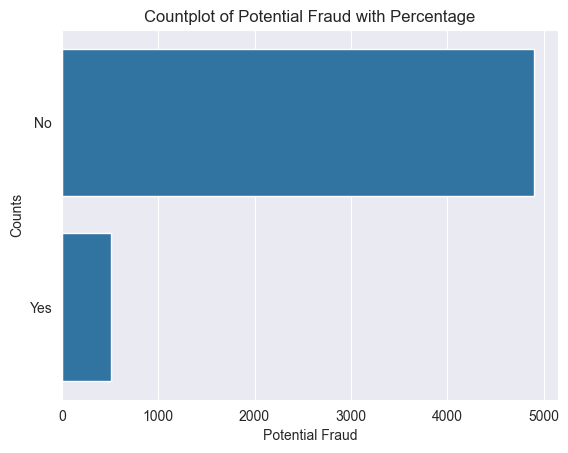

In [12]:
#countplot
sns.countplot(mapping_data['PotentialFraud'])

# # Calculate percentages
# total = len(mapping_data)
# for i, count in enumerate(mapping_data['PotentialFraud'].value_counts()):
#     percentage = 100 * count / total
#     plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')
    
# Add labels and title
plt.xlabel('Potential Fraud')
plt.ylabel('Counts')
plt.title('Countplot of Potential Fraud with Percentage')

# Show plot
plt.show()

**Observation**

- The dataset exhibits a significant class imbalance, with 90.6% of the providers labeled as non-fraudulent and only 9.4% labeled as fraudulent.


- The value of 'No' will be replaced with '0' and the value of 'Yes' will be replaced with 1 later during the featurization for modeling. 

### EDA of Benificiary dataset

#### Beneficiary Birth Year Analysis

In [ ]:
#Extract birth year
DOB_yr = beneficiary_data['DOB'].apply(pd.to_datetime).dt.year

plt.figure(figsize = (14, 6))
sns.countplot(DOB_yr)
plt.xticks(rotation = 90)

# Add labels and title
plt.xlabel('Year of Birth')
plt.ylabel('Counts')
plt.title('Beneficiary Birth Year Analysis')
plt.show()

**Observation**

- Most claims are from the beneficiaries born between 1939-1943 


- Age will be extracted using 'DOB' and 'DOD' later during feature extraction 

#### Gender Distribution among Beneficiaries

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(beneficiary_data['Gender'], hue = beneficiary_data['Gender'])

# Add legend
plt.legend(labels=['Male', 'Female'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Gender Distribution among Beneficiaries')
plt.show()

**Observation**

The gender distribution among beneficiaries shows a near balance, with approximately 42% identified as belonging to one gender and about 57% categorized as the female.

#### Race Distribution among Beneficiaries

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(beneficiary_data['Race'])

# Calculate percentages
total = len(beneficiary_data)
for i, count in enumerate(beneficiary_data['Race'].value_counts()):
    percentage = 100 * count / total
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')
    
# Add labels and title
plt.xlabel('Race')
plt.ylabel('Counts')
plt.title('Race Distribution among Beneficiaries')
plt.show()

In [ ]:
# Calculate counts for each category
race_counts = beneficiary_data['Race'].value_counts()

# Create a pie chart
plt.figure(figsize = (5,5))

# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0, 0)  

#add colors
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99']

plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', explode = explode, shadow = True, startangle = 45, colors = colors)

# Add a title
plt.title('Race Distribution among Beneficiaries', fontsize = 14)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.tight_layout()

# Show the plot
plt.show()

**Observation**

- There are four different races encoded as: ‘1’, ‘2’, ‘3’ and ‘5’ 
- It exhibits a significant class imbalance, with the majority of beneficiaries, nearly 85%, falling into class 1.

#### Distribution of Months Covered by Part A and Part B

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(beneficiary_data['NoOfMonths_PartACov'])
plt.title('Distribution of Months Covered by Part A')

plt.subplot(1, 2, 2)
sns.countplot(beneficiary_data['NoOfMonths_PartBCov'])
plt.title('Distribution of Months Covered by Part B')

plt.show()

**Observation**

- The 'NoOfMonths_PartACov' feature is predominantly represented by the value '12', accounting for approximately 99.16% of the dataset.


- Conversely, a mere 0.72% of the data contains the value '0' in the 'NoOfMonths_PartACov' feature.


- Similarly, in the 'NoOfMonths_PartBCov' feature, around 98.81% of the data is comprised of the value '12'.


- Given the overwhelming prevalence of the value '12' in both features, their impact on classification tasks is negligible.


- As such, it is recommended to drop these features from the dataset due to their limited variability and potential lack of discriminatory power in classification models.

#### Distribution of Renal Disease Indicators

Renal Disease Indicator is a flag to indicate whether the beneficiary has any problem related to kidney failure or not

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(beneficiary_data['RenalDiseaseIndicator'])

# Calculate percentages
total = len(beneficiary_data)
for i, count in enumerate(beneficiary_data['RenalDiseaseIndicator'].value_counts()):
    percentage = 100 * count / total
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')
    
# Add labels and title
plt.xlabel('RenalDiseaseIndicator')
plt.ylabel('Counts')
plt.title('Distribution of Renal Disease Indicators')
plt.show()

**Observation**

- The 'RenalDiseaseIndicator' feature serves as a binary flag denoting the presence or absence of any form of renal disease, with values '0' representing 'No' and 'Y' representing 'Yes'.


- The value of 'Y' will be replaced with '1' to indicate 'Yes' later during the featurization.


- Approximately 14% of beneficiaries have been diagnosed with kidney failure, as indicated by a positive value ('Y') in the 'RenalDiseaseIndicator'.

#### Chronic Condition-Related Variables Distribution Insights


The term "chronic condition" typically refers to a long-lasting health condition that persists over an extended period, often for years or even a lifetime. 

In [ ]:
#Extract Chronic condition related variables
cols = [col for col in beneficiary_data.columns if 'Chronic' in col]

plt.figure(figsize = (20, 20))
for i in range(len(cols)):
    plt.subplot(4,3,i+1)
    col = cols[i]
    sns.countplot(beneficiary_data[col], hue = beneficiary_data[col])
    plt.legend(labels = ['Yes', 'No'])
    plt.title(f'Distribution of {col}')
  
plt.tight_layout()
plt.show()

**Observation**

- Each Chronic Condition feature contains two values: '1' and '2'.


- '2' will be substituted with '0' to signify 'No' during the featurization process.


- With the exception of 'ChronicCond_Cancer' and 'ChronicCond_Stroke', the data is adequately balanced across all features.


- This implies that the less patients are diagnosed with stroke or cancer 

#### Visualizing Amount Distributions: Insights from Histograms and Boxplots

In [ ]:
#Extract amount related variables
cols = [col for col in beneficiary_data.columns if 'Amt' in col]

plt.figure(figsize = (12, 17))
for i in range(len(cols)):
    col = cols[i]
    #plot histogram / PDF
    plt.subplot(4,2,i*2+1)
    sns.distplot(beneficiary_data[col])
    plt.title(f'PDF of {col}')
    #Plot boxplot
    plt.subplot(4,2,i*2+2)
    sns.boxplot(beneficiary_data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

**Observation**

- The 'IPAnnualReimbursementAmt' feature predominantly ranges between 0 and 5000, with most amounts falling within this range.


- Similarly, the majority of amounts in the 'IPAnnualDeductibleAmt' feature lie between 0 and 2000.


- For the 'OPAnnualReimbursementAmt' feature, most amounts are concentrated between 0 and 5000.


- Likewise, the 'OPAnnualDeductibleAmt' feature exhibits a prevalent range of amounts between 0 and 2000.


- Any amounts exceeding the aforementioned ranges are considered outliers. However, in our case, such high-value amounts may indicate potential fraud cases, and thus, they will not be removed as outliers.

In [ ]:
beneficiary_data.head(3)

#### EDA of Claim Settlement Delay and Treatment Duration features 

These features will be extracted from 4 date related features 
1. ClaimEndDt
2. ClaimStartDt
3. DischargeDt
4. AdmissionDt

- Claim Settlement Delay feature will be extracted by taking the difference of ClaimEndDt and ClaimStartDt 

- Similarly, Treatment duration feature will be extracted by taking the difference of DischargeDt and AdmissionDt

In [ ]:
data = inpatient_data

#extracting date columns 
date_cols = [col for col in data.columns if ('Dt' in col or 'DOB' in col or 'DOD' in col)]

#converting it to datetime format
data[date_cols] = data[date_cols].apply(pd.to_datetime)

#Claim Settlement Delay
data['ClaimSettlementDelay'] = (data['ClaimEndDt'] - data['ClaimStartDt']).dt.days


#Treatment Duration
data['TreatmentDuration'] = (data['DischargeDt'] - data['AdmissionDt']).dt.days

#Lets fill empty cells of "TreatmentDuration" variable wuth 0 as those records is available only for InPatient data
data['TreatmentDuration'].fillna(value = 0, inplace = True)

#converting values to integer for easier analysis 
data['TreatmentDuration'] = data['TreatmentDuration'].astype(int)

In [ ]:
data['TreatmentDuration'].describe()

In [ ]:
cols = ['ClaimSettlementDelay', 'TreatmentDuration']

plt.figure(figsize = (12, 8))
for i, col in enumerate(cols):
    #Plot Histigram/PDF
    plt.subplot(2,2,i*2+1)
    sns.distplot(data[col])
    plt.title(f'PDF of {col}')
    #Plot Boxplot
    plt.subplot(2,2,i*2+2)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()

**Observation**

- Both the 'ClaimSettlementDelay' and 'TreatmentDuration' features exhibit a similar distribution pattern.


- Notably, the 'TreatmentDuration' feature is exclusively associated with Inpatient data and is absent in Outpatient data.


- Therefore, we can retain any one feature and discard other during feature filtering. If not, there will be high correlation between these 2 variables. 


- Across both fraudulent and non-fraudulent cases, the data distribution for each feature demonstrates consistent trends.


- Outliers are present in both fraudulent and non-fraudulent cases within the features, which are deemed crucial factors for identifying potentially fraudulent claim records.


- Therefore, it is concluded that these outliers should not be removed, as they may play a critical role in distinguishing fraudulent claims from legitimate ones.

## Data Preprocessing

Merging the inpatient and outpatient datasets makes sense since they have mostly the same columns. This way, we'll have one dataset that covers all the details from both inpatient and outpatient claims for better analysis.

In [7]:
inp_outp_data = pd.concat([inpatient_data, outpatient_data])
inp_outp_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


Now, we can merge the resulting dataset with the Beneficiary dataset using the Beneficiary ID, thereby incorporating beneficiary-related information into the combined dataset.

In [8]:
merged_data = pd.merge(left = inp_outp_data, right = beneficiary_data, on = 'BeneID', how = 'inner')
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100


In [9]:
merged_data.shape

(558211, 54)

Finally,  lets merge the dataset with the Provider dataset which will enable the mapping of the class label, aiding in determining whether the provider is fraudulent or not.

In [10]:
healthcare_data = pd.merge(left = merged_data, right = mapping_data, on = 'Provider', how = 'inner')
healthcare_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No


In [11]:
healthcare_data.shape

(558211, 55)

Thereby, our final combined dataset consists of 5,58,211 rows and 55 columns 

Now, lets check the basic info of the dataset 

In [12]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

It is imperative that the dataset contains variables with all datatypes such as int, float, object and date. It is also evident that all the datetime variables are encoded as 'objct' type which needs to be converted to datetime format for better analysis. 

It is also evident that our dataset contains lot of missing values. 

In [13]:
#percentage of missing values across each columns 
round(healthcare_data.isnull().mean() * 100, 2).sort_values(ascending = False)

ClmProcedureCode_6                 100.00
ClmProcedureCode_5                 100.00
ClmProcedureCode_4                  99.98
ClmProcedureCode_3                  99.83
DOD                                 99.26
ClmDiagnosisCode_10                 99.10
ClmProcedureCode_2                  99.02
ClmProcedureCode_1                  95.82
AdmissionDt                         92.75
DischargeDt                         92.75
DiagnosisGroupCode                  92.75
ClmDiagnosisCode_9                  92.51
ClmDiagnosisCode_8                  90.43
ClmDiagnosisCode_7                  88.14
ClmDiagnosisCode_6                  84.88
ClmDiagnosisCode_5                  79.95
OperatingPhysician                  79.50
ClmAdmitDiagnosisCode               73.86
ClmDiagnosisCode_4                  70.52
OtherPhysician                      64.22
ClmDiagnosisCode_3                  56.46
ClmDiagnosisCode_2                  35.04
ClmDiagnosisCode_1                   1.87
AttendingPhysician                

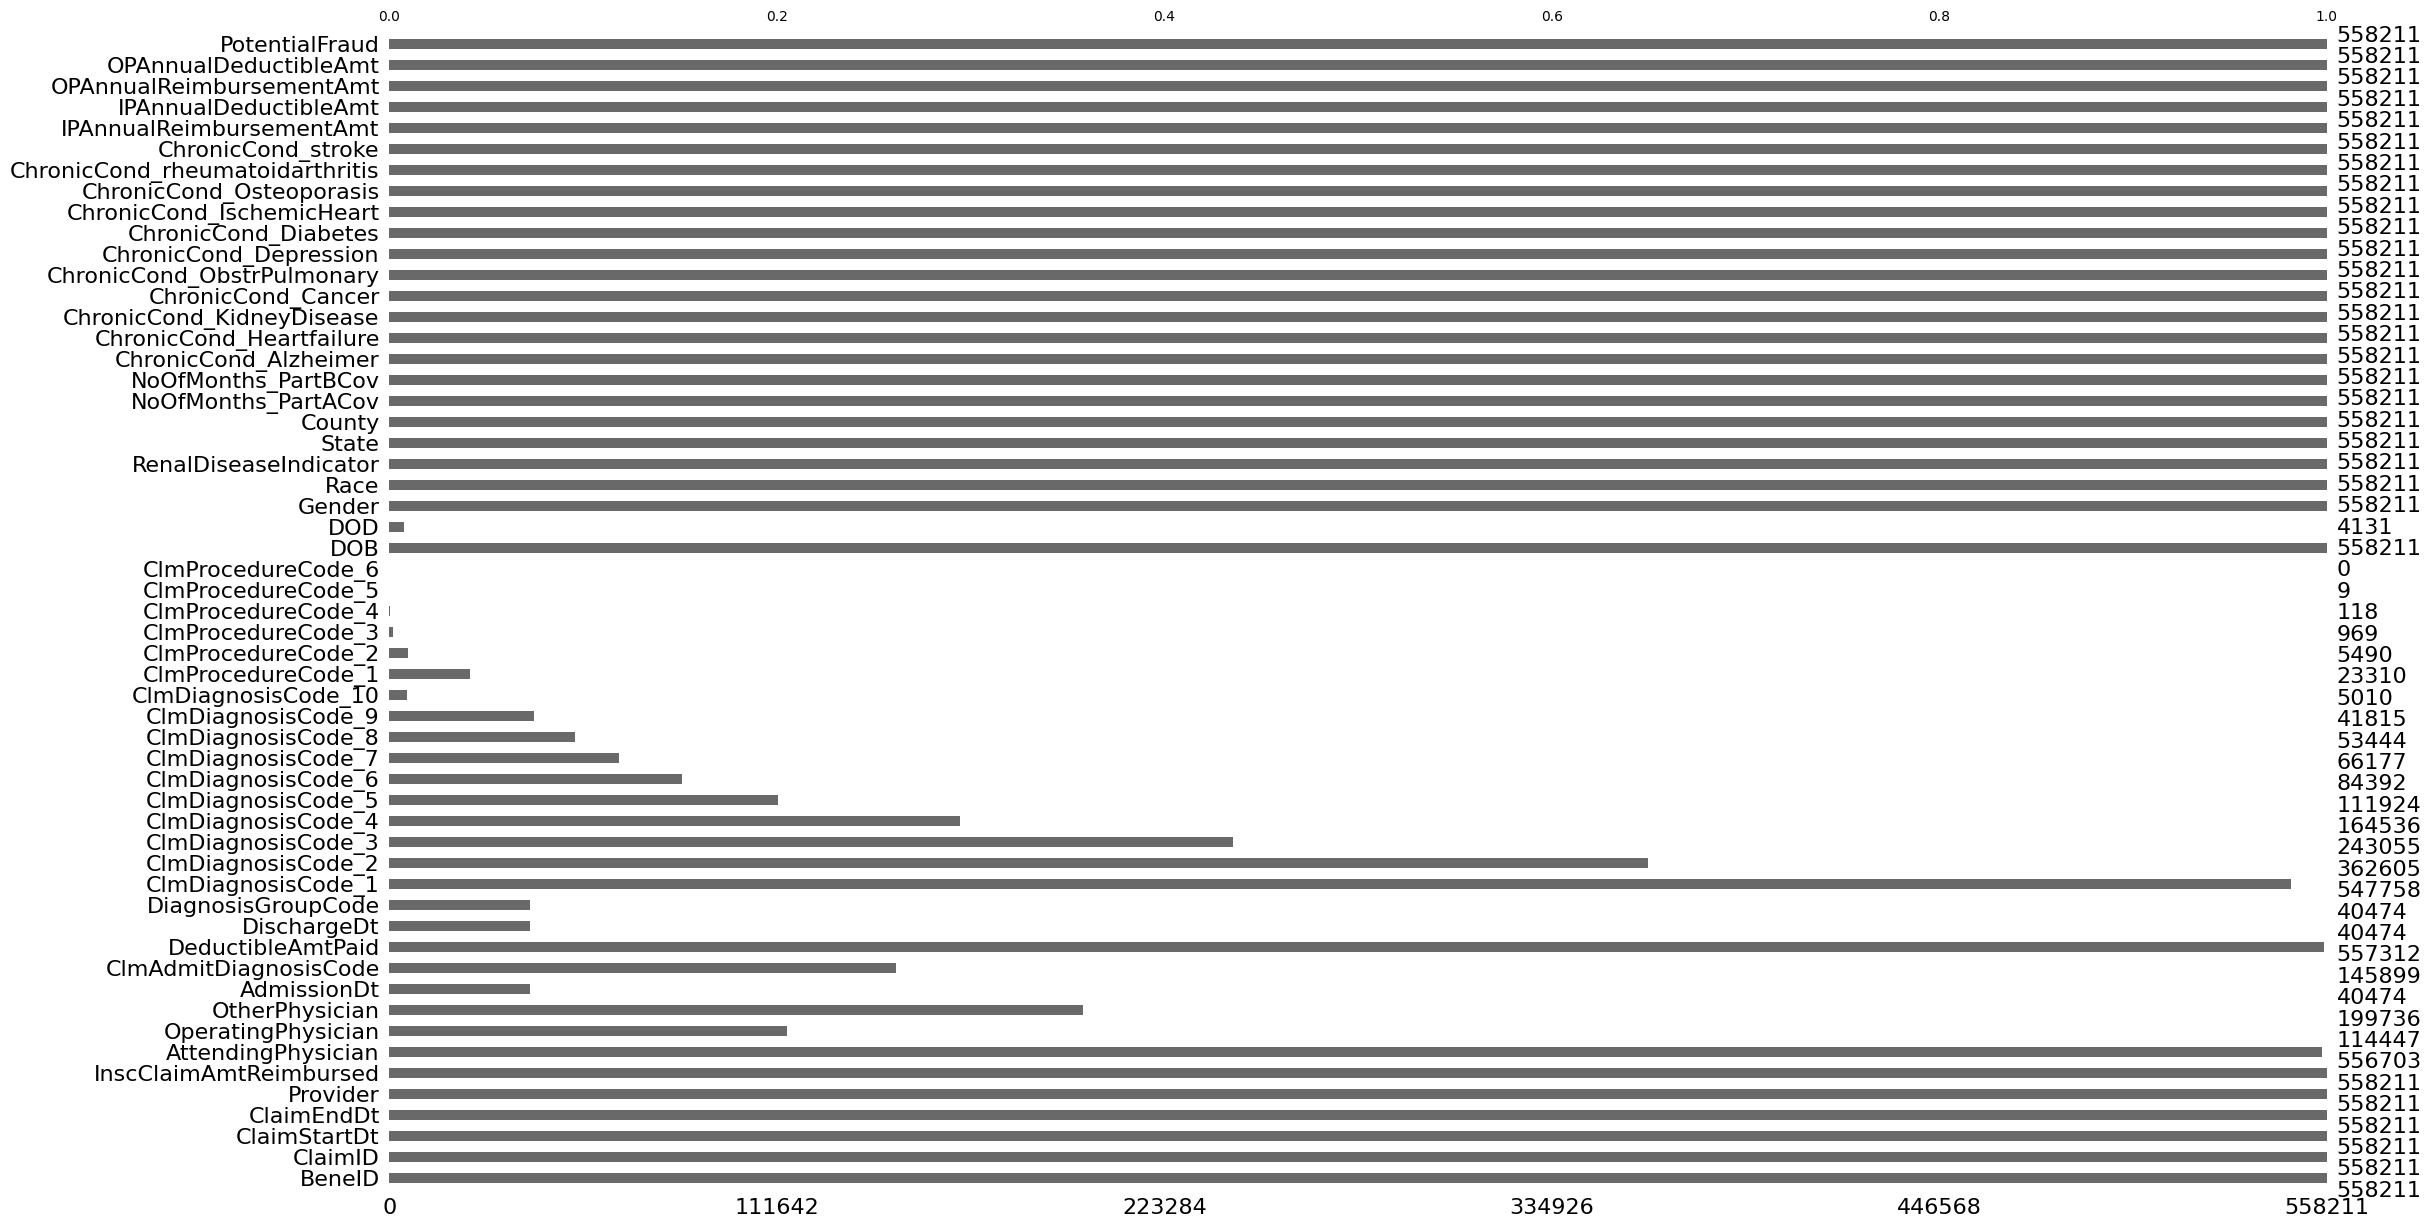

In [14]:
#visualizing missing values across each columns using missingno library 
msno.bar(healthcare_data)
plt.show()

In [15]:
#lets fill empty values of 'DeductibleAmtPaid' variable with 0 since its numeric
healthcare_data['DeductibleAmtPaid'].fillna(value = 0, inplace = True)

Lets drop the variables with more than 99% of missing values and are least helpful in further analysis. 

In [16]:
columns_to_drop = ['ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                   'ClmDiagnosisCode_10']

healthcare_data.drop(columns_to_drop, axis = 1, inplace = True)
healthcare_data.shape

(558211, 50)

Handling date related columns

In [17]:
#extracting date columns 
date_cols = [col for col in healthcare_data.columns if ('Dt' in col or 'DOB' in col or 'DOD' in col)]

#converting it to datetime format
healthcare_data[date_cols] = healthcare_data[date_cols].apply(pd.to_datetime)

#display date variables along with their data type 
healthcare_data[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ClaimStartDt  558211 non-null  datetime64[ns]
 1   ClaimEndDt    558211 non-null  datetime64[ns]
 2   AdmissionDt   40474 non-null   datetime64[ns]
 3   DischargeDt   40474 non-null   datetime64[ns]
 4   DOB           558211 non-null  datetime64[ns]
 5   DOD           4131 non-null    datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 25.6 MB


## Feature Engineering 

### Feature Extraction 

In [18]:
healthcare_data.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No


#### New Features from Date Features:

Here, we will generate new features from the date features:
1. Claim Settlement Delay: Difference between the Claim End Date and Claim Start Date.
2. Treatment Duration: Difference between Discharge Date and Admission Date.
3. Age: Based on the DOB.
4. IsDead: Based on the DOD.

In [19]:
#Claim Settlement Delay
healthcare_data['ClaimSettlementDelay'] = (healthcare_data['ClaimEndDt'] - healthcare_data['ClaimStartDt']).dt.days

#Treatment Duration
healthcare_data['TreatmentDuration'] = (healthcare_data['DischargeDt'] - healthcare_data['AdmissionDt']).dt.days

#Lets fill empty cells of "TreatmentDuration" variable wuth 0 as those records is available only for InPatient data
healthcare_data['TreatmentDuration'].fillna(value = 0, inplace = True)

#converting values to integer for easier analysis 
healthcare_data['TreatmentDuration'] = healthcare_data['TreatmentDuration'].astype(int)


#Age
maxDt = max(healthcare_data['ClaimEndDt'].max(), healthcare_data['DischargeDt'].max())

healthcare_data['Age'] = healthcare_data.apply(lambda x : round(((x['DOD'] - x['DOB']).days)/365) if pd.notnull(x['DOD']) 
                                               else round(((maxDt - x['DOB']).days)/365), axis = 1)
                                

#isDead                                               
healthcare_data['isDead'] = healthcare_data['DOD'].apply(lambda x : 1 if pd.notnull(x) else 0)

#display newly generated features
healthcare_data[['ClaimSettlementDelay', 'TreatmentDuration', 'Age', 'isDead']].head()

,ClaimSettlementDelay,TreatmentDuration,Age,isDead
0,6,6,67,0
1,2,2,67,0
2,3,3,67,0
3,8,8,96,0
4,17,17,72,0


#### New Features from Reimbursement Amount and Deductible Amount:

Here, we will generate new features from the features:

1. TotalClaimAmount = InscClaimAmtReimbursed + DeductibleAmtPaid.
2. IPTotalAmount = IPAnnualReimbursementAmt + IPAnnualDeductibleAmt.
3. OPTotalAmount = OPAnnualReimbursementAmt + OPAnnualDeductibleAmt.

In [20]:
#Extract all amount related columns
amt_cols = [col for col in healthcare_data.columns if 'Amt' in col]

#TotalClaimAmount 
healthcare_data['TotalClaimAmount'] = healthcare_data['InscClaimAmtReimbursed'] + healthcare_data['DeductibleAmtPaid']

#IPTotalAmount
healthcare_data['IPTotalAmount'] = healthcare_data['IPAnnualReimbursementAmt'] + healthcare_data['IPAnnualDeductibleAmt']

#OPTotalAmount
healthcare_data['OPTotalAmount'] = healthcare_data['OPAnnualReimbursementAmt'] + healthcare_data['OPAnnualDeductibleAmt']

#display newly generated features
healthcare_data[['TotalClaimAmount', 'IPTotalAmount', 'OPTotalAmount']].head()

,TotalClaimAmount,IPTotalAmount,OPTotalAmount
0,27068.0,39204,130
1,6068.0,39204,130
2,6068.0,39204,130
3,6068.0,6068,570
4,11068.0,23396,220



#### New Features to indicate Inpatient and Outpatient:

Here, we will generate a new feature called ‘IsInpatient’ having a value of 1 if the claim record is for Inpatient data and 0 if the claim record is for Outpatient data. As the feature ‘DiagnosisGroupCode’ exists only for the Inpatient dataset, we will create the values for ‘IsInpatient’ based on whether is a value in the ‘DiagnosisGroupCode’ feature.

In [21]:
healthcare_data['isInpatient'] = healthcare_data['DiagnosisGroupCode'].apply(lambda x : 1 if pd.notnull(x) else 0)
healthcare_data['isInpatient'].head()

0    1
1    1
2    1
3    1
4    1
Name: isInpatient, dtype: int64

#### New Features from the Physician related features:

We will derive new features from the features ‘AttendingPhysician’, ‘OperatingPhysician’ and ‘OtherPhysician’ as:

1. UniquePhys: Number of different physicians who attended/operated the patient and/or performed any other work in a claim record.
2. TotalPhys: Total number of attending, operating and other physicians who worked for a patient in a claim record.
3. PhysMultiRole1: Flag to indicate if a single physician is involved with multiple roles for a patient in a claim record.
4. PhysMultiRole2: Flag to indicate if there are only two physicians involved in a claim record and one of them had multiple roles.


In [22]:
healthcare_data.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimSettlementDelay,TreatmentDuration,Age,isDead,TotalClaimAmount,IPTotalAmount,OPTotalAmount,isInpatient
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes,6,6,67,0,27068.0,39204,130,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,2,2,67,0,6068.0,39204,130,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,No,3,3,67,0,6068.0,39204,130,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,331.0,NaN,1914-03-01,NaT,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,No,8,8,96,0,6068.0,6068,570,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,3893.0,NaN,1938-04-01,NaT,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,No,17,17,72,0,11068.0,23396,220,1


In [23]:
#extract physician related columns
phys_cols = [col for col in healthcare_data.columns if 'Physician' in col]

#UniquePhys
healthcare_data['UniquePhys'] = healthcare_data[phys_cols].apply(lambda x : len(set([phys for phys in x if pd.notnull(phys)])), axis = 1)

#TotalPhys
healthcare_data['TotalPhys'] = healthcare_data[phys_cols].apply(lambda x : len([phys for phys in x if pd.notnull(phys)]), axis = 1)


#PhysMultiRole1
healthcare_data['PhysMultiRole1'] = healthcare_data[['UniquePhys', 'TotalPhys']].apply(
                                    lambda x : 1 if x['UniquePhys'] == 1 and x['TotalPhys'] > 1 else 0, axis = 1)

#PhysMultiRole2
healthcare_data['PhysMultiRole2'] = healthcare_data[['UniquePhys', 'TotalPhys']].apply(
                                    lambda x : 1 if x['UniquePhys'] == 2 and x['TotalPhys'] > 2 else 0, axis = 1)

#display newly generated features
healthcare_data[['UniquePhys', 'TotalPhys', 'PhysMultiRole1', 'PhysMultiRole2']].head()

,UniquePhys,TotalPhys,PhysMultiRole1,PhysMultiRole2
0,1,1,0,0
1,1,2,1,0
2,2,2,0,0
3,3,3,0,0
4,2,2,0,0


## Preparing the data for Modeling

### Data Mapping

Lets start with mapping our Target Variable 'Potential Fraud' with 'Yes' and 'No' to 1 and 0 

In [24]:
healthcare_data['PotentialFraud'] = healthcare_data['PotentialFraud'].map({'Yes' : 1, 'No' : 0})
healthcare_data['PotentialFraud'].value_counts(normalize = True)

PotentialFraud
0    0.618789
1    0.381211
Name: proportion, dtype: float64

The 'RenalDiseaseIndicator' columns has 2 values 0 and 'Y'. Lets map 'Y' with 1

In [25]:
healthcare_data['RenalDiseaseIndicator'] = healthcare_data['RenalDiseaseIndicator'].replace('Y', 1)
healthcare_data['RenalDiseaseIndicator'] = healthcare_data['RenalDiseaseIndicator'].astype(int)
healthcare_data['RenalDiseaseIndicator'].value_counts(normalize = True)

RenalDiseaseIndicator
0    0.803214
1    0.196786
Name: proportion, dtype: float64

All Chronic conditions related variables are encoded with 1 and 2. Upon, analyzing the dataset, we found that 2 stands for not diagnosed with that particular chronic condition. So, lets replace it with 0

In [26]:
#Extract all chronic conditions related columns 
chronic_cols = [col for col in healthcare_data.columns if 'Chronic' in col]

#Mapping chronic_cols 
for col in chronic_cols:
    healthcare_data[col].replace(to_replace = 2, value = 0, inplace = True)




The 'Gender' feature has 2 values: 1 and 2. Here 1 is Male and 2 is Female. Now, lets replace all the values with 2 to 0 for uniformity and modeling  

In [27]:
healthcare_data['Gender'].replace(to_replace=2, value=0, inplace=True)
healthcare_data['Gender'].value_counts()

Gender
0    323114
1    235097
Name: count, dtype: int64

In [28]:
healthcare_data.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimSettlementDelay,TreatmentDuration,Age,isDead,TotalClaimAmount,IPTotalAmount,OPTotalAmount,isInpatient,UniquePhys,TotalPhys,PhysMultiRole1,PhysMultiRole2
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,1,6,6,67,0,27068.0,39204,130,1,1,1,0,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,2,2,67,0,6068.0,39204,130,1,1,2,1,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,3,3,67,0,6068.0,39204,130,1,2,2,0,0


In [29]:
def encodeCatFeatures(dataset, existingFeatures, newFeatures, suffix=''):
        '''
        Function to create new encoded features for Categorical Features, based on their count of values 
        in the existing set of features. 
        '''
        # Fetch the number of datapoints in the given dataset
        size = dataset.shape[0]
        
        # Iterate through each of the new features:
        for newFeature in newFeatures:
            l1 = list() # List to store a list of 0s and 1s for each existing feature if the new feature value exist in the existing features.
            # Iterate through each of the existing feature set and perform the logic to count.
            for existingFeature in existingFeatures:
                l2 = list() # List to store '1' if the new feature value exist in the existing feature.
                for value in list(dataset[existingFeature]):
                    if str(value) == str(newFeature):
                        l2.append(1)
                    else:
                        l2.append(0)
                l1.append(l2)
            count = np.zeros(size) # Array to store the count of the existing features containing the new features.
            
            # Iterate through each of the list in 'listIsExistAllFeatures' and sum the counts.
            for i in range(0, len(l1)):
                count = count + np.array(l1[i])
            dataset[suffix + newFeature] = count.astype(int)
        return dataset

#### Encoding Physician related columns

In [30]:
#Top 3 physicians 
for i in phys_cols:
    print(healthcare_data[i].value_counts()[:3])
    print('\n')

AttendingPhysician
PHY330576    2534
PHY350277    1628
PHY412132    1321
Name: count, dtype: int64


OperatingPhysician
PHY330576    424
PHY424897    293
PHY314027    256
Name: count, dtype: int64


OtherPhysician
PHY412132    1247
PHY341578    1098
PHY338032    1070
Name: count, dtype: int64




In [31]:
# Call the encodedFeatures function to generate new features: 'PHY412132', 'PHY337425', 'PHY330576'
healthcare_data = encodeCatFeatures(healthcare_data, phys_cols, ['PHY412132', 'PHY337425', 'PHY330576'])

#### Encoding Claims Diagnosis Codes related columns

In [32]:
# Fetch the columns related to the Claims Diagnosis Codes
clm_diag_cols = [col for col in healthcare_data.columns if 'ClmDiagnosisCode' in col]

# # Call the encodeCatFeatures function to generate new feature for the top 7 Claim Diagnosis Codes
healthcare_data = encodeCatFeatures(healthcare_data, clm_diag_cols, ['4019', '2724', '42731', '25000', '2449', '53081', '4280'], 'ClmDiagnosisCode_')

#For each of the Claim Diagnosis Code Features, replace the values with 1 if there is a value, else replace with 0 .
for i in clm_diag_cols:
    healthcare_data[i] = healthcare_data[i].apply(lambda x: 1 if pd.notnull(x) else 0)

#### Encoding Claims Procedure Codes related columns

In [33]:
# Fetch the columns related to the Claims Procedure Codes
clm_proc_cols = [col for col in healthcare_data.columns if 'Procedure' in col]

# Call the encodeCatFeatures function to generate new feature for the top 5 Claim Procedure Codes
healthcare_data = encodeCatFeatures(healthcare_data, clm_proc_cols, ['9904.0', '8154.0', '66.0', '3893.0', '3995.0'], 'ClmProcedureCode_')

# For each of the Claim Procedure Code Features, replace the values with 1 if there is a value, else replace with 0 .
for i in clm_proc_cols:
    healthcare_data[i] = healthcare_data[i].apply(lambda x: 1 if pd.notnull(x) else 0)

#### Claim Admit Diagnosis Code and Diagnosis Group Code Features

In [34]:
# For each of the Claim Admit Diagnosis Code and Diagnosis Group Code Features, 
# replace the values with 1 if there is a value, else replace with 0.

for i in ['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode']:
    healthcare_data[i] = healthcare_data[i].apply(lambda x: 1 if pd.notnull(x) else 0)

In [35]:
healthcare_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,ClaimSettlementDelay,TreatmentDuration,Age,isDead,TotalClaimAmount,IPTotalAmount,OPTotalAmount,isInpatient,UniquePhys,TotalPhys,PhysMultiRole1,PhysMultiRole2,PHY412132,PHY337425,PHY330576,ClmDiagnosisCode_4019,ClmDiagnosisCode_2724,ClmDiagnosisCode_42731,ClmDiagnosisCode_25000,ClmDiagnosisCode_2449,ClmDiagnosisCode_53081,ClmDiagnosisCode_4280,ClmProcedureCode_9904.0,ClmProcedureCode_8154.0,ClmProcedureCode_66.0,ClmProcedureCode_3893.0,ClmProcedureCode_3995.0
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,1,1068.0,2009-04-18,1,1,1,1,1,1,1,1,1,1,0,0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,1,6,6,67,0,27068.0,39204,130,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,1,1068.0,2009-09-02,1,1,1,1,0,0,0,0,0,0,1,0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,2,2,67,0,6068.0,39204,130,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,1,1068.0,2009-09-20,1,1,1,1,1,1,1,0,0,0,0,0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,3,3,67,0,6068.0,39204,130,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,1,1068.0,2009-02-22,1,1,1,1,1,1,1,1,1,1,1,0,1914-03-01,NaT,0,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,8,8,96,0,6068.0,6068,570,1,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,1,1068.0,2009-08-30,1,1,1,1,1,1,1,1,1,1,1,0,1938-04-01,NaT,0,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,0,17,17,72,0,11068.0,23396,220,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
#shape of the dataset
healthcare_data.shape

(558211, 77)

In [37]:
#missing value count
healthcare_data.isnull().sum().sort_values(ascending = False)[:20]

DOD                         554080
AdmissionDt                 517737
DischargeDt                 517737
OperatingPhysician          443764
OtherPhysician              358475
AttendingPhysician            1508
BeneID                           0
TreatmentDuration                0
isInpatient                      0
OPTotalAmount                    0
IPTotalAmount                    0
TotalClaimAmount                 0
isDead                           0
Age                              0
PotentialFraud                   0
ClaimSettlementDelay             0
TotalPhys                        0
OPAnnualDeductibleAmt            0
OPAnnualReimbursementAmt         0
IPAnnualDeductibleAmt            0
dtype: int64

### Feature Filtering

Lets remove date, amount and physician related columns as we have already derived the new features from those and are not helpful in analysis anymore

In [38]:
#drop date related columns
healthcare_data.drop(date_cols, axis = 1, inplace = True)

#drop amount related columns
healthcare_data.drop(amt_cols, axis = 1, inplace = True)

#drop physician related columns
healthcare_data.drop(phys_cols, axis = 1, inplace = True)

In [39]:
# Extract primary identifier columns in a new dataframe
identifierData = healthcare_data[['ClaimID', 'Provider']]

#Remove all unique identifiers from the main dataset as their purpose is to just uniquely identify the row and are not helpful 
# in further analysis / modeling

healthcare_data.drop(['ClaimID', 'Provider', 'BeneID', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis = 1, inplace = True)

# Remove some set of Claim Diagnosis/Procedure Code Features
healthcare_data.drop(['DiagnosisGroupCode', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
                       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_1'], 
                       axis = 1, inplace=True)
    
#shape of the dataset
healthcare_data.shape

(558211, 45)

In [40]:
#Total missing values
sum(healthcare_data.isnull().sum())

0

Therefore, With our dataset now free of missing values or empty cells, we are ready to proceed to the next stage of the cycle: preparing the data for modeling.

In [41]:
healthcare_data.shape

(558211, 45)

In [42]:
healthcare_data.head()

,ClmAdmitDiagnosisCode,Gender,Race,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,PotentialFraud,ClaimSettlementDelay,TreatmentDuration,Age,isDead,TotalClaimAmount,IPTotalAmount,OPTotalAmount,isInpatient,UniquePhys,TotalPhys,PhysMultiRole1,PhysMultiRole2,PHY412132,PHY337425,PHY330576,ClmDiagnosisCode_4019,ClmDiagnosisCode_2724,ClmDiagnosisCode_42731,ClmDiagnosisCode_25000,ClmDiagnosisCode_2449,ClmDiagnosisCode_53081,ClmDiagnosisCode_4280,ClmProcedureCode_9904.0,ClmProcedureCode_8154.0,ClmProcedureCode_66.0,ClmProcedureCode_3893.0,ClmProcedureCode_3995.0
0,1,1,1,0,39,230,1,0,1,0,0,1,1,1,0,1,1,1,6,6,67,0,27068.0,39204,130,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,39,230,1,0,1,0,0,1,1,1,0,1,1,0,2,2,67,0,6068.0,39204,130,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,39,230,1,0,1,0,0,1,1,1,0,1,1,0,3,3,67,0,6068.0,39204,130,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,2,0,1,360,0,1,1,0,0,1,1,0,0,1,1,0,8,8,96,0,6068.0,6068,570,1,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,45,780,0,1,1,0,1,1,0,1,0,0,0,0,17,17,72,0,11068.0,23396,220,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Now, lets split the data into train and test sets 

In [43]:
#Extract independent variables
X = healthcare_data.drop(columns = 'PotentialFraud') 

#Extract target variables
y = healthcare_data['PotentialFraud']

In [44]:
#Split the dataset into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

#Print the dimension of each
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (390747, 44)
X_test: (167464, 44)
y_train: (390747,)
y_test: (167464,)


### Response Encoding 

We will be applying response encoding on  2 high dimensional categorical features namely 'State' and 'County'

In [45]:
#Extract the columns 
cols = ['State', 'County']

#Instantiate the object
response_encoder = TargetEncoder(cols = cols)

#Fit the data on train set and transform the data on both train and test set 
X_train_encoded = response_encoder.fit_transform(X_train, y_train)
X_test_encoded = response_encoder.transform(X_test)

In [46]:
X_train_encoded[['State', 'County']].head()

,State,County
269492,0.205692,0.225150
133316,0.571563,0.325881
496460,0.345482,0.302454
477264,0.347681,0.359857
52106,0.129340,0.454872


### Feature Scaling 

#### Normalizing the quantitative variables using Standardized (Z-score Normalization) scaler

In [47]:
#Extract numerical columns
numerical_cols = ['ClaimSettlementDelay', 'TreatmentDuration', 'Race', 'Age', 'TotalClaimAmount', 'IPTotalAmount', 'OPTotalAmount', 
                  'UniquePhys', 'TotalPhys']

#Instantiate an object
scaler = StandardScaler()

#Fit the data on train set and transform the data on both train and test set 
X_train_scaled = X_train_encoded.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])

X_test_scaled = X_test_encoded.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

In [48]:
X_train_scaled[numerical_cols].describe().round(2)

,ClaimSettlementDelay,TreatmentDuration,Race,Age,TotalClaimAmount,IPTotalAmount,OPTotalAmount,UniquePhys,TotalPhys
count,390747.00,390747.00,390747.00,390747.00,390747.00,390747.00,390747.00,390747.00,390747.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.35,-0.20,-0.36,-3.68,-0.27,-1.01,-0.63,-2.56,-2.44
25%,-0.35,-0.20,-0.36,-0.45,-0.26,-0.46,-0.47,-0.58,-0.88
50%,-0.35,-0.20,-0.36,0.09,-0.25,-0.46,-0.27,-0.58,-0.88
75%,-0.35,-0.20,-0.36,0.63,-0.17,0.10,0.09,1.40,0.69
max,6.99,16.42,5.21,2.09,31.22,12.60,21.14,3.38,2.25


In [49]:
X_test_scaled[numerical_cols].describe()

,ClaimSettlementDelay,TreatmentDuration,Race,Age,TotalClaimAmount,IPTotalAmount,OPTotalAmount,UniquePhys,TotalPhys
count,167464.000000,167464.000000,167464.000000,167464.000000,167464.000000,167464.000000,167464.000000,167464.000000,167464.000000
mean,-0.002644,-0.002843,-0.000477,-0.002792,-0.000505,0.005896,-0.003927,-0.001447,-0.000385
std,1.001306,1.010551,0.994794,1.003489,1.002153,1.014043,0.982775,0.999954,1.000738
min,-0.353214,-0.195897,-0.355037,-3.679852,-0.268751,-0.461096,-0.624556,-2.559409,-2.438546
25%,-0.353214,-0.195897,-0.355037,-0.450783,-0.258760,-0.461096,-0.467556,-0.580280,-0.875587
50%,-0.353214,-0.195897,-0.355037,0.087395,-0.246270,-0.461096,-0.268690,-0.580280,-0.875587
75%,-0.353214,-0.195897,-0.355037,0.702456,-0.193815,0.103279,0.089270,1.398848,0.687371
max,6.785188,16.423277,5.211678,2.086343,31.221638,12.252502,21.138962,3.377977,2.250329


### Analyzing Multicollinearity

In [50]:
# plt.figure(figsize = (35,20))
# sns.heatmap(X_train_scaled.corr(), cmap = 'YlGnBu', annot = True)
# plt.show()

**Observations:**

- isInpatient exhibits a high positive correlation with both TotalClaimAmount (0.7) and TreatmentDuration (0.69), indicating that inpatient status is significantly associated with higher claim amounts and longer treatment durations.


- A strong positive correlation is also observed between TotalClaimAmount and TreatmentDuration (0.64), suggesting that longer treatments typically incur higher costs.


- A moderate positive correlation between isInpatient and ClmAdminDiagnosisCode (0.47) suggests a noteworthy relationship where inpatient treatments are somewhat associated with specific administrative diagnosis codes.


- There is a moderate positive correlation between TotalClaimAmount and ClmProcedureCode_2 (0.4), indicating a relationship between the costs of claims and certain procedural codes.


- The variables UniquePhys and TotalPhys share a high correlation (0.65), indicating that treatments involving a larger number of unique physicians tend to have a higher total number of physician engagements.


- The dataset shows other instances of moderate correlations among different features, though these are not detailed exhaustively here.


- Notably, the analysis does not reveal any significant negative correlations among the independent variables, suggesting an absence of inversely related variable pairs within this dataset.

In [51]:
# plt.figure(figsize = (35,20))
# sns.heatmap(healthcare_data.corr(), cmap = 'YlGnBu', annot = True)
# plt.show()

**Observations:**

- isInpatient exhibits a high positive correlation with both TotalClaimAmount (0.7) and TreatmentDuration (0.7), indicating that inpatient status is significantly associated with higher claim amounts and longer treatment durations.


- A strong positive correlation is also observed between TotalClaimAmount and TreatmentDuration (0.65), suggesting that longer treatments typically incur higher costs.


- A moderate positive correlation between isInpatient and ClmAdmitDiagnosisCode (0.47) suggests a noteworthy relationship where inpatient treatments are somewhat associated with specific administrative diagnosis codes.


- There is a moderate positive correlation between TotalClaimAmount and ClmProcedureCode_2 (0.4), indicating a relationship between the costs of claims and certain procedural codes.


- The variables UniquePhys and TotalPhys share a high correlation (0.65), indicating that treatments involving a larger number of unique physicians tend to have a higher total number of physician engagements.


- The dataset shows other instances of moderate correlations among different features, though these are not detailed exhaustively here.


- Notably, the analysis does not reveal any significant negative correlations among the independent variables, suggesting an absence of inversely related variable pairs within this dataset.

In [52]:
# correlation_matrix = healthcare_data.corr()

# correlation_matrix_long = correlation_matrix.unstack().reset_index()
# correlation_matrix_long.columns = ['Variable 1', 'Variable 2', 'Correlation']
# correlation_matrix_long.to_csv('correlation_matrix_long.csv', index=False)

In [53]:
#reassigning the names for simplicity
X_train = X_train_scaled
X_test = X_test_scaled
y_train = y_train
y_test = y_test

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(390747, 44)
(167464, 44)
(390747,)
(167464,)


In [55]:
X_train_sample = X_train[:30000]
X_test_sample = X_test[:10000]
y_train_sample = y_train[:30000]
y_test_sample = y_test[:10000]

print(X_train_sample.shape)
print(X_test_sample.shape)
print(y_train_sample.shape)
print(y_test_sample.shape)

(30000, 44)
(10000, 44)
(30000,)
(10000,)


### Oversampling using SMOTE

Over-sampling increases the number of instances in the minority class. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) generate synthetic samples rather than replicating existing ones, which can mitigate overfitting.

In [56]:
# Instantiate SMOTE
smote = SMOTE()

# Fit the smote on the training data
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train_sample, y_train_sample = smote.fit_resample(X_train_sample, y_train_sample)


print(y_train.value_counts())
print('\n')
print(y_train_sample.value_counts())

PotentialFraud
0    241937
1    241937
Name: count, dtype: int64


PotentialFraud
0    18604
1    18604
Name: count, dtype: int64


In [57]:
# Fit the smote on the test data
X_test, y_test = smote.fit_resample(X_test, y_test)
X_test_sample, y_test_sample = smote.fit_resample(X_test_sample, y_test_sample)

print(y_test.value_counts())
print('\n')
print(y_test_sample.value_counts())

PotentialFraud
0    103478
1    103478
Name: count, dtype: int64


PotentialFraud
0    6180
1    6180
Name: count, dtype: int64


# Model Building

#### Coarse tuning using RFE to select top 20 variables

In [230]:
#instantiate Logistic Regression object
lr = LogisticRegression()

#Selecting top 20 variables using RFE
rfe = RFE(estimator = lr, n_features_to_select =  20) 

#fit the model
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.ranking_, rfe.support_))

[('ClmAdmitDiagnosisCode', 6, False),
 ('Gender', 8, False),
 ('Race', 21, False),
 ('RenalDiseaseIndicator', 10, False),
 ('State', 1, True),
 ('County', 1, True),
 ('ChronicCond_Alzheimer', 13, False),
 ('ChronicCond_Heartfailure', 14, False),
 ('ChronicCond_KidneyDisease', 16, False),
 ('ChronicCond_Cancer', 4, False),
 ('ChronicCond_ObstrPulmonary', 17, False),
 ('ChronicCond_Depression', 12, False),
 ('ChronicCond_Diabetes', 15, False),
 ('ChronicCond_IschemicHeart', 11, False),
 ('ChronicCond_Osteoporasis', 7, False),
 ('ChronicCond_rheumatoidarthritis', 9, False),
 ('ChronicCond_stroke', 5, False),
 ('ClaimSettlementDelay', 22, False),
 ('TreatmentDuration', 20, False),
 ('Age', 24, False),
 ('isDead', 1, True),
 ('TotalClaimAmount', 25, False),
 ('IPTotalAmount', 19, False),
 ('OPTotalAmount', 18, False),
 ('isInpatient', 1, True),
 ('UniquePhys', 1, True),
 ('TotalPhys', 1, True),
 ('PhysMultiRole1', 23, False),
 ('PhysMultiRole2', 1, True),
 ('PHY412132', 1, True),
 ('PHY3374

In [231]:
#Variables that we are getting rid of 
X_train.columns[~rfe.support_]

Index(['ClmAdmitDiagnosisCode', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'ClaimSettlementDelay', 'TreatmentDuration',
       'Age', 'TotalClaimAmount', 'IPTotalAmount', 'OPTotalAmount',
       'PhysMultiRole1', 'ClmDiagnosisCode_4019', 'ClmProcedureCode_8154.0'],
      dtype='object')

In [232]:
#listing all of the top 20 columns
cols = X_train.columns[rfe.support_]
cols

Index(['State', 'County', 'isDead', 'isInpatient', 'UniquePhys', 'TotalPhys',
       'PhysMultiRole2', 'PHY412132', 'PHY337425', 'PHY330576',
       'ClmDiagnosisCode_2724', 'ClmDiagnosisCode_42731',
       'ClmDiagnosisCode_25000', 'ClmDiagnosisCode_2449',
       'ClmDiagnosisCode_53081', 'ClmDiagnosisCode_4280',
       'ClmProcedureCode_9904.0', 'ClmProcedureCode_66.0',
       'ClmProcedureCode_3893.0', 'ClmProcedureCode_3995.0'],
      dtype='object')

### Fine tuning using VIF

Lets build stats models here for high interpretability

In [233]:
#add constant to X_train
X_train_sm = sm.add_constant(X_train[cols])

#instantiate statsmodel
lr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

#fit the model
res = lr.fit()

#statistical summary 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PotentialFraud   No. Observations:               483874
Model:                            GLM   Df Residuals:                   483853
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.8964e+05
Date:                Tue, 19 Mar 2024   Deviance:                   5.7928e+05
Time:                        17:42:12   Pearson chi2:                 4.85e+05
No. Iterations:                    28   Pseudo R-squ. (CS):             0.1723
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.1939      0.014   -234.047      0.000      -3.221      -3.167
State                       4.0133      0.025    160.655      0.000       3.964       4.062
County                      4.0226      0.026    153.399      0.000       3.971       4.074
isDead                     -0.3810      0.041     -9.230      0.000      -0.462      -0.300
isInpatient                 1.2364      0.014     91.195      0.000       1.210       1.263
UniquePhys                  0.2891      0.004     67.467      0.000       0.281       0.297
TotalPhys                  -0.2024      0.005    -43.600      0.000      -0.212      -0.193
PhysMultiRole2              0.2430      0.019     12.566      0.000       0.205       0.281
PHY412132                  27.7673   2.65e+04      0.001      0.999   -5.18e+04    5.19e+04
PHY337425                  26.9009   2.99e+04      0.001      0.999   -5.86e+04    5.87e+04
PHY330576                  28.6558   2.71e+04      0.001      0.999   -5.31e+04    5.32e+04
ClmDiagnosisCode_2724      -0.2325      0.014    -16.674      0.000      -0.260      -0.205
ClmDiagnosisCode_42731     -0.2888      0.019    -15.360      0.000      -0.326      -0.252
ClmDiagnosisCode_25000     -0.2810      0.014    -20.384      0.000      -0.308      -0.254
ClmDiagnosisCode_2449      -0.3555      0.020    -17.650      0.000      -0.395      -0.316
ClmDiagnosisCode_53081     -0.3616      0.022    -16.414      0.000      -0.405      -0.318
ClmDiagnosisCode_4280      -0.2331      0.021    -10.987      0.000      -0.275      -0.192
ClmProcedureCode_9904.0    -0.5999      0.076     -7.843      0.000      -0.750      -0.450
ClmProcedureCode_66.0      -0.2697      0.085     -3.173      0.002      -0.436      -0.103
ClmProcedureCode_3893.0    -0.5678      0.088     -6.453      0.000      -0.740      -0.395
ClmProcedureCode_3995.0    -0.5253      0.091     -5.754      0.000      -0.704      -0.346
===========================================================================================
"""

In [234]:
#create dataframe
vif = pd.DataFrame()

#columns
vif['Feature'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
0,State,6.85
1,County,6.84
5,TotalPhys,2.07
4,UniquePhys,1.83
3,isInpatient,1.30
6,PhysMultiRole2,1.27
12,ClmDiagnosisCode_25000,1.08
10,ClmDiagnosisCode_2724,1.08
15,ClmDiagnosisCode_4280,1.07
11,ClmDiagnosisCode_42731,1.06


In [235]:
cols = cols.drop('PHY330576', 1)

#### Model 2

In [236]:
#add constant to X_train
X_train_sm = sm.add_constant(X_train[cols])

#instantiate statsmodel
lr2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

#fit the model
res = lr2.fit()

#statistical summary 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PotentialFraud   No. Observations:               483874
Model:                            GLM   Df Residuals:                   483854
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.9095e+05
Date:                Tue, 19 Mar 2024   Deviance:                   5.8191e+05
Time:                        17:42:35   Pearson chi2:                 4.87e+05
No. Iterations:                    27   Pseudo R-squ. (CS):             0.1678
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.1980      0.014   -234.255      0.000      -3.225      -3.171
State                       4.0153      0.025    160.710      0.000       3.966       4.064
County                      4.0559      0.026    154.625      0.000       4.004       4.107
isDead                     -0.3735      0.041     -9.092      0.000      -0.454      -0.293
isInpatient                 1.2268      0.014     90.502      0.000       1.200       1.253
UniquePhys                  0.2908      0.004     67.982      0.000       0.282       0.299
TotalPhys                  -0.2040      0.005    -44.009      0.000      -0.213      -0.195
PhysMultiRole2              0.2623      0.019     13.640      0.000       0.225       0.300
PHY412132                  26.7546   1.61e+04      0.002      0.999   -3.14e+04    3.15e+04
PHY337425                  25.8817   1.81e+04      0.001      0.999   -3.55e+04    3.56e+04
ClmDiagnosisCode_2724      -0.2323      0.014    -16.696      0.000      -0.260      -0.205
ClmDiagnosisCode_42731     -0.2892      0.019    -15.408      0.000      -0.326      -0.252
ClmDiagnosisCode_25000     -0.2800      0.014    -20.363      0.000      -0.307      -0.253
ClmDiagnosisCode_2449      -0.3540      0.020    -17.615      0.000      -0.393      -0.315
ClmDiagnosisCode_53081     -0.3615      0.022    -16.440      0.000      -0.405      -0.318
ClmDiagnosisCode_4280      -0.2325      0.021    -10.981      0.000      -0.274      -0.191
ClmProcedureCode_9904.0    -0.5970      0.077     -7.803      0.000      -0.747      -0.447
ClmProcedureCode_66.0      -0.2707      0.085     -3.183      0.001      -0.437      -0.104
ClmProcedureCode_3893.0    -0.5687      0.088     -6.460      0.000      -0.741      -0.396
ClmProcedureCode_3995.0    -0.5268      0.091     -5.768      0.000      -0.706      -0.348
===========================================================================================
"""

In [237]:
#create dataframe
vif = pd.DataFrame()

#columns
vif['Feature'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
0,State,6.85
1,County,6.83
5,TotalPhys,2.07
4,UniquePhys,1.83
3,isInpatient,1.30
6,PhysMultiRole2,1.27
11,ClmDiagnosisCode_25000,1.08
9,ClmDiagnosisCode_2724,1.08
14,ClmDiagnosisCode_4280,1.07
10,ClmDiagnosisCode_42731,1.06


In [238]:
cols = cols.drop('PHY412132', 1)

#### Model 3

In [239]:
#add constant to X_train
X_train_sm = sm.add_constant(X_train[cols])

#instantiate statsmodel
lr3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

#fit the model
res = lr3.fit()

#statistical summary 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PotentialFraud   No. Observations:               483874
Model:                            GLM   Df Residuals:                   483855
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.9176e+05
Date:                Tue, 19 Mar 2024   Deviance:                   5.8352e+05
Time:                        17:42:57   Pearson chi2:                 4.89e+05
No. Iterations:                    27   Pseudo R-squ. (CS):             0.1650
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.2151      0.014   -235.477      0.000      -3.242      -3.188
State                       4.0777      0.025    163.562      0.000       4.029       4.127
County                      4.0544      0.026    154.533      0.000       4.003       4.106
isDead                     -0.3700      0.041     -9.030      0.000      -0.450      -0.290
isInpatient                 1.2227      0.014     90.158      0.000       1.196       1.249
UniquePhys                  0.2877      0.004     67.443      0.000       0.279       0.296
TotalPhys                  -0.1982      0.005    -42.933      0.000      -0.207      -0.189
PhysMultiRole2              0.2617      0.019     13.658      0.000       0.224       0.299
PHY337425                  25.8649   1.81e+04      0.001      0.999   -3.55e+04    3.56e+04
ClmDiagnosisCode_2724      -0.2322      0.014    -16.714      0.000      -0.259      -0.205
ClmDiagnosisCode_42731     -0.2878      0.019    -15.355      0.000      -0.325      -0.251
ClmDiagnosisCode_25000     -0.2803      0.014    -20.407      0.000      -0.307      -0.253
ClmDiagnosisCode_2449      -0.3538      0.020    -17.630      0.000      -0.393      -0.314
ClmDiagnosisCode_53081     -0.3619      0.022    -16.478      0.000      -0.405      -0.319
ClmDiagnosisCode_4280      -0.2317      0.021    -10.955      0.000      -0.273      -0.190
ClmProcedureCode_9904.0    -0.6002      0.077     -7.839      0.000      -0.750      -0.450
ClmProcedureCode_66.0      -0.2730      0.085     -3.208      0.001      -0.440      -0.106
ClmProcedureCode_3893.0    -0.5711      0.088     -6.482      0.000      -0.744      -0.398
ClmProcedureCode_3995.0    -0.5298      0.091     -5.796      0.000      -0.709      -0.351
===========================================================================================
"""

In [240]:
#create dataframe
vif = pd.DataFrame()

#columns
vif['Feature'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
1,County,6.83
0,State,6.82
5,TotalPhys,2.07
4,UniquePhys,1.83
3,isInpatient,1.29
6,PhysMultiRole2,1.27
10,ClmDiagnosisCode_25000,1.08
8,ClmDiagnosisCode_2724,1.08
13,ClmDiagnosisCode_4280,1.07
9,ClmDiagnosisCode_42731,1.06


In [241]:
cols = cols.drop('PHY337425', 1)

#### Model 4

In [242]:
#add constant to X_train
X_train_sm = sm.add_constant(X_train[cols])

#instantiate statsmodel
lr4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

#fit the model
res = lr4.fit()

#statistical summary 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PotentialFraud   No. Observations:               483874
Model:                            GLM   Df Residuals:                   483856
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.9206e+05
Date:                Tue, 19 Mar 2024   Deviance:                   5.8412e+05
Time:                        17:43:11   Pearson chi2:                 4.91e+05
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1640
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.2356      0.014   -237.396      0.000      -3.262      -3.209
State                       4.1046      0.025    164.754      0.000       4.056       4.153
County                      4.0875      0.026    155.992      0.000       4.036       4.139
isDead                     -0.3700      0.041     -9.034      0.000      -0.450      -0.290
isInpatient                 1.2222      0.014     90.071      0.000       1.196       1.249
UniquePhys                  0.2862      0.004     67.166      0.000       0.278       0.295
TotalPhys                  -0.1957      0.005    -42.465      0.000      -0.205      -0.187
PhysMultiRole2              0.2603      0.019     13.597      0.000       0.223       0.298
ClmDiagnosisCode_2724      -0.2322      0.014    -16.716      0.000      -0.259      -0.205
ClmDiagnosisCode_42731     -0.2876      0.019    -15.347      0.000      -0.324      -0.251
ClmDiagnosisCode_25000     -0.2800      0.014    -20.398      0.000      -0.307      -0.253
ClmDiagnosisCode_2449      -0.3537      0.020    -17.634      0.000      -0.393      -0.314
ClmDiagnosisCode_53081     -0.3621      0.022    -16.491      0.000      -0.405      -0.319
ClmDiagnosisCode_4280      -0.2311      0.021    -10.925      0.000      -0.273      -0.190
ClmProcedureCode_9904.0    -0.6019      0.077     -7.855      0.000      -0.752      -0.452
ClmProcedureCode_66.0      -0.2725      0.085     -3.201      0.001      -0.439      -0.106
ClmProcedureCode_3893.0    -0.5723      0.088     -6.491      0.000      -0.745      -0.399
ClmProcedureCode_3995.0    -0.5315      0.091     -5.810      0.000      -0.711      -0.352
===========================================================================================
"""

In [243]:
#create dataframe
vif = pd.DataFrame()

#columns
vif['Feature'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
0,State,6.82
1,County,6.82
5,TotalPhys,2.06
4,UniquePhys,1.82
3,isInpatient,1.29
6,PhysMultiRole2,1.27
9,ClmDiagnosisCode_25000,1.08
7,ClmDiagnosisCode_2724,1.08
12,ClmDiagnosisCode_4280,1.07
8,ClmDiagnosisCode_42731,1.06


In [244]:
cols = cols.drop('State', 1)

#### Model 5

In [245]:
#add constant to X_train
X_train_sm = sm.add_constant(X_train[cols])

#instantiate statsmodel
lr4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

#fit the model
res = lr4.fit()

#statistical summary 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         PotentialFraud   No. Observations:               483874
Model:                            GLM   Df Residuals:                   483857
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.0646e+05
Date:                Tue, 19 Mar 2024   Deviance:                   6.1292e+05
Time:                        17:43:23   Pearson chi2:                 4.87e+05
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1127
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9473      0.010   -187.504      0.000      -1.968      -1.927
County                      4.9198      0.025    194.879      0.000       4.870       4.969
isDead                     -0.3828      0.040     -9.651      0.000      -0.461      -0.305
isInpatient                 1.1131      0.013     84.277      0.000       1.087       1.139
UniquePhys                  0.2960      0.004     71.591      0.000       0.288       0.304
TotalPhys                  -0.2043      0.004    -45.731      0.000      -0.213      -0.196
PhysMultiRole2              0.2678      0.019     14.445      0.000       0.231       0.304
ClmDiagnosisCode_2724      -0.2275      0.013    -16.882      0.000      -0.254      -0.201
ClmDiagnosisCode_42731     -0.2888      0.018    -15.882      0.000      -0.324      -0.253
ClmDiagnosisCode_25000     -0.2784      0.013    -20.913      0.000      -0.304      -0.252
ClmDiagnosisCode_2449      -0.3472      0.019    -17.850      0.000      -0.385      -0.309
ClmDiagnosisCode_53081     -0.3598      0.021    -16.896      0.000      -0.402      -0.318
ClmDiagnosisCode_4280      -0.2329      0.021    -11.334      0.000      -0.273      -0.193
ClmProcedureCode_9904.0    -0.5573      0.075     -7.462      0.000      -0.704      -0.411
ClmProcedureCode_66.0      -0.2697      0.083     -3.263      0.001      -0.432      -0.108
ClmProcedureCode_3893.0    -0.5794      0.086     -6.768      0.000      -0.747      -0.412
ClmProcedureCode_3995.0    -0.5079      0.089     -5.718      0.000      -0.682      -0.334
===========================================================================================
"""

In [246]:
#create dataframe
vif = pd.DataFrame()

#columns
vif['Feature'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Feature,VIF
4,TotalPhys,2.06
3,UniquePhys,1.82
2,isInpatient,1.29
5,PhysMultiRole2,1.26
0,County,1.23
6,ClmDiagnosisCode_2724,1.08
8,ClmDiagnosisCode_25000,1.08
11,ClmDiagnosisCode_4280,1.07
7,ClmDiagnosisCode_42731,1.06
10,ClmDiagnosisCode_53081,1.05


Therefore, having attained an optimal model where coefficients are confidently determined (p-value < 0.05) and all variables exhibit low VIF values, indicating minimal correlation among predictors (excluding the target variable), let's proceed with the evaluation of the model.

In [247]:
cols.size

16

In [248]:
cols

Index(['County', 'isDead', 'isInpatient', 'UniquePhys', 'TotalPhys',
       'PhysMultiRole2', 'ClmDiagnosisCode_2724', 'ClmDiagnosisCode_42731',
       'ClmDiagnosisCode_25000', 'ClmDiagnosisCode_2449',
       'ClmDiagnosisCode_53081', 'ClmDiagnosisCode_4280',
       'ClmProcedureCode_9904.0', 'ClmProcedureCode_66.0',
       'ClmProcedureCode_3893.0', 'ClmProcedureCode_3995.0'],
      dtype='object')

### Model Evaluation

In [247]:
y_train_pred = res.predict(X_train_sm)

y_train_pred[:10].values.reshape(-1)

array([0.30361821, 0.46512595, 0.45349886, 0.45823098, 0.63720132,
       0.59962139, 0.6994498 , 0.20213956, 0.34814228, 0.70838931])

In [248]:
# creating the data frame that contains the visitorID, converted, converted_prob and predicted values
y_train_pred_final = pd.DataFrame({'Row Number' : y_train.index, 'PotentialFraud' : y_train.values, 
                                   'Fraud_prob' : y_train_pred})

# Choosing cutoff randomly of 0.5 
y_train_pred_final['Predicted'] = y_train_pred_final.Fraud_prob.map(lambda x : 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Row Number,PotentialFraud,Fraud_prob,Predicted
0,0,0,0.303618,0
1,1,0,0.465126,0
2,2,0,0.453499,0
3,3,1,0.458231,0
4,4,0,0.637201,1


In [249]:
# confusion matrix 
cm = confusion_matrix(y_train_pred_final.PotentialFraud, y_train_pred_final.Predicted)

# TP - True Positives, TN = True Negatives, FP - False Positives, FN - False Negatives
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')
print(f'False Positives: {TP}')
print(f'False Negatives: {TP}')

True Positives: 148361
True Negatives: 162900
False Positives: 148361
False Negatives: 148361


In [250]:
print(classification_report(y_train_pred_final.PotentialFraud, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65    241937
           1       0.65      0.61      0.63    241937

    accuracy                           0.64    483874
   macro avg       0.64      0.64      0.64    483874
weighted avg       0.64      0.64      0.64    483874



In [251]:
#Recall
recall = round(TP / float(TP + FN), 4)
print('Recall:',recall)

#False Negative Rate
fnr = round(FN / float(FN + TP), 4)
print('False Negative Rate:', fnr)

Recall: 0.6132
False Negative Rate: 0.3868


In [252]:
# plotting ROC curve 

def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

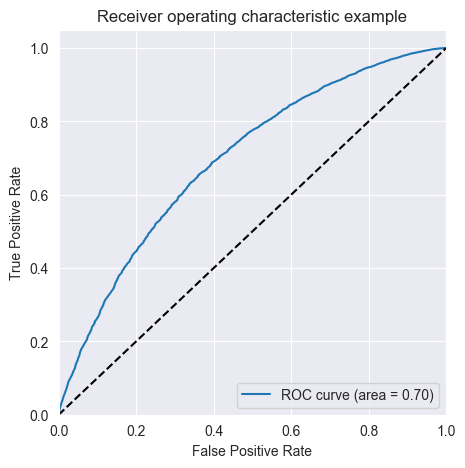

In [253]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.PotentialFraud, y_train_pred_final.Fraud_prob, drop_intermediate = False )

draw_roc(y_train_pred_final.PotentialFraud, y_train_pred_final.Fraud_prob)

### Threshold determination using ROC

In [254]:
numbers = [float(i/10) for i in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Fraud_prob.map(lambda x : 1 if x > i else 0)

y_train_pred_final.head()

,Row Number,PotentialFraud,Fraud_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.303618,0,1,1,1,1,0,0,0,0,0,0
1,1,0,0.465126,0,1,1,1,1,1,0,0,0,0,0
2,2,0,0.453499,0,1,1,1,1,1,0,0,0,0,0
3,3,1,0.458231,0,1,1,1,1,1,0,0,0,0,0
4,4,0,0.637201,1,1,1,1,1,1,1,1,0,0,0


In [255]:
# Creating the data frame that contain probability, accuracy, sensitivity and specificity

cutoff_df = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

num = [float(i/10) for i in range(10)]

for i in num:
    cm = confusion_matrix(y_train_pred_final.PotentialFraud, y_train_pred_final[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total 
    sensi = cm[1,1] / float(cm[1,1] + cm[1,0])
    speci = cm[0,0] / float(cm[0,0] + cm[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

cutoff_df = cutoff_df.reset_index()
cutoff_df.drop('index', axis = 1, inplace = True)
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0,0.0,0.500000,1.000000,0.000000
1,0.1,0.500535,0.999971,0.001099
2,0.2,0.516978,0.996007,0.037948
3,0.3,0.567358,0.954674,0.180043
4,0.4,0.627145,0.819837,0.434452
5,0.5,0.643269,0.613222,0.673316
6,0.6,0.616177,0.403465,0.828889
7,0.7,0.568609,0.211667,0.925551
8,0.8,0.524081,0.067175,0.980987
9,0.9,0.505241,0.012801,0.997681


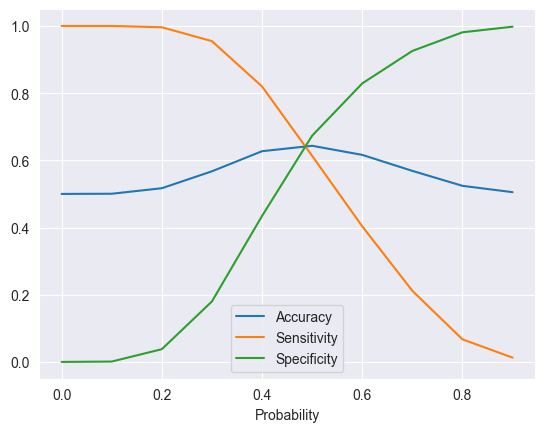

In [256]:
cutoff_df.plot.line(x = 'Probability', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

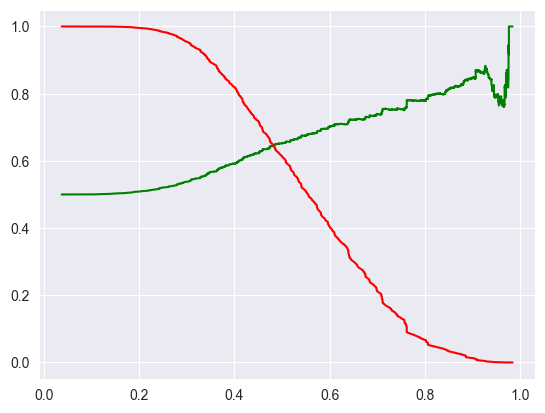

In [257]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.PotentialFraud, y_train_pred_final.Fraud_prob)

plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')
plt.show()

#### Predictions on test set

In [271]:
# adding constant 
X_test_sm = sm.add_constant(X_test[cols])

# predicting values 
y_test_pred = res.predict(X_test_sm)

# creating dataframe for y_test_pred
y_pred_df = pd.DataFrame(y_test_pred)

# creating dataframe for y_test 
y_test_df = pd.DataFrame(y_test)
y_test_df['Row Number'] = y_test.index

# removing index of 2 dataframes in order to merge it 
y_pred_df.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

# merging 2 dataframes
y_test_pred_final = pd.concat([y_test_df, y_pred_df], axis = 1)

# renaming the column 
y_test_pred_final = y_test_pred_final.rename(columns = {0 : 'Fraud_prob'})

# ordering the columns 
y_test_pred_final = y_test_pred_final.reindex(columns = ['Row Number', 'PotentialFraud', 'Fraud_prob'])

y_test_pred_final['predicted'] = y_test_pred_final.Fraud_prob.map(lambda x : 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Row Number,PotentialFraud,Fraud_prob,predicted
0,230744,0,0.377894,0
1,27826,1,0.814217,1
2,314625,0,0.413484,0
3,140256,0,0.553179,1
4,502955,1,0.450895,0


In [274]:
print(classification_report(y_test_pred_final.PotentialFraud, y_test_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70    103478
           1       0.53      0.59      0.56     63986

    accuracy                           0.64    167464
   macro avg       0.63      0.63      0.63    167464
weighted avg       0.65      0.64      0.65    167464



In [276]:
# confusion matrix 
cm = confusion_matrix(y_test_pred_final.PotentialFraud, y_test_pred_final.predicted)

# TP - True Positives, TN = True Negatives, FP - False Positives, FN - False Negatives
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

#Recall
recall = round(TP / float(TP + FN), 4)
print('Recall:',recall)

#False Negative Rate
fnr = round(FN / float(FN + TP), 4)
print('False Negative Rate:', fnr)

Recall: 0.5948
False Negative Rate: 0.4052


## Top 10 Variables

1. County (4.9192)
2. isInpatient (1.1099)
3. ClmProcedureCode_3893.0 (-0.5745)
4. ClmProcedureCode_9904.0 (-0.5413)
5. ClmProcedureCode_3995.0 (-0.5286)
6. ClmDiagnosisCode_53081 (-0.3636)
7. ClmDiagnosisCode_2449 (-0.3426)
8. UniquePhys (0.2961)
9. ClmDiagnosisCode_42731 (-0.2851)
10. PhysMultiRole2 (0.2543)

### PCA

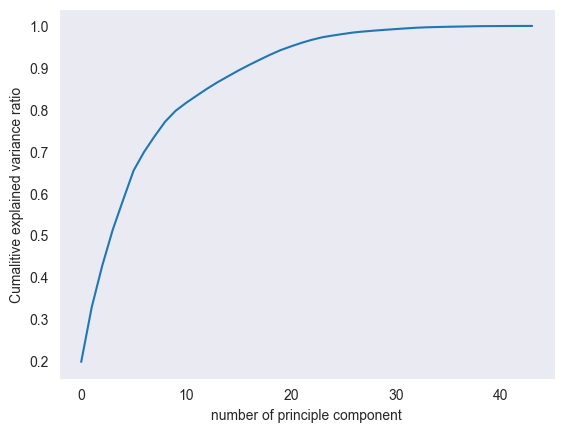

In [205]:
#initalize an object
pca = PCA(random_state=42)

#fit the data
pca.fit_transform(X_train)
cum_variance = np.cumsum(pca.explained_variance_ratio_)

## lets plot the variance aganist different number of principle component

plt.plot(cum_variance)
plt.xlabel("number of principle component")
plt.ylabel("Cumalitive explained variance ratio")
plt.grid()
plt.show()

In [206]:
cum_variance[20]

0.9510312743944477

**Observation**

The top 25 principal components account for 98.07% of the variance within the dataset, indicating a substantial concentration of explanatory power in a relatively small subset of features. 

In [207]:
#PCA with 25 components
pca = PCA(n_components=20, random_state=42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## On Sample set

#### Lets create a function to generate model evaluation scores and store in a new dataframe

In [58]:
## function to generate model evaluation scores.
def Model_matrix(model_name, model, Stage , X_train_sample = X_train_sample, X_test_sample = X_test_sample, y_train_sample = y_train_sample , y_test_sample = y_test_sample):
    #train set
    pred = model.predict(X_train_sample)
    train_acc = accuracy_score(y_train_sample, pred).round(2)
    train_conf = confusion_matrix(y_train_sample, pred)
    train_precision_score = precision_score(y_train_sample, pred).round(2)
    train_recall_score = recall_score(y_train_sample, pred).round(2)
    train_f1_score = f1_score(y_train_sample, pred).round(2)
    train_ROC = roc_auc_score(y_train_sample, pred).round(2)
    train_TP = train_conf[1,1]
    train_FN = train_conf[1,0]
    train_fnr = round(train_FN / float(train_FN + train_TP), 2)

    #test set
    test_pred = model.predict(X_test_sample)
    test_acc = accuracy_score(y_test_sample, test_pred).round(2)
    test_conf = confusion_matrix(y_test_sample, test_pred)
    test_precision_score = precision_score(y_test_sample, test_pred).round(2)
    test_recall_score = recall_score(y_test_sample, test_pred).round(2)
    test_f1_score = f1_score(y_test_sample, test_pred).round(2)
    test_ROC = roc_auc_score(y_test_sample, test_pred).round(2)
    test_TP = test_conf[1,1]
    test_FN = test_conf[1,0]
    test_fnr = round(test_FN / float(test_FN + test_TP), 2)
    
    new_results = pd.DataFrame({'Method':[model_name],
                                'Hyperper Tuning': [Stage],
                                'Train_Accuracy':[train_acc],
                                'Train_Precision':[train_precision_score],
                                'Train_Recall':[train_recall_score],
                                'Train_FNR': [train_fnr],
                                'Train_F1':[train_f1_score],
                                'Train_ROC_AUC': [train_ROC],    
                                'Test_Accuracy':[test_acc],
                                'Test_Precision':[test_precision_score],
                                'Test_Recall':[test_recall_score],
                                'Test_FNR' : [test_fnr],
                                'Test_F1':[test_f1_score],
                                'Test_ROC_AUC': [test_ROC]   })
    
    print(model_name,"\n---------------------------\n")
    print(f"TRAIN Confusion Matrix : \n{train_conf}")
    print()
    print(print(f"TEST Confusion Matrix : \n{test_conf}"))
    
#     results = pd.concat([results,new_results])
    return new_results


### I. Logistic Regression

In [59]:
lr = LogisticRegression()
lr.fit(X_train_sample, y_train_sample)

new_results1 = Model_matrix("logistic Regression", lr, "No")
new_results1

logistic Regression 
---------------------------

TRAIN Confusion Matrix : 
[[12936  5668]
 [ 5958 12646]]

TEST Confusion Matrix : 
[[4359 1821]
 [2012 4168]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,logistic Regression,No,0.69,0.69,0.68,0.32,0.69,0.69,0.69,0.7,0.67,0.33,0.69,0.69


In [60]:
# Hyper parameter tuning

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver' : ['lbfgs', 'liblinear'],
    'max_iter' : [50, 100, 1000]}

# Initialize the classifier
lr2 = LogisticRegression()   

# Initialize GridSearchCV
lr2_rand_search = GridSearchCV(lr2, param_grid, scoring= 'recall', cv = 4, n_jobs = -1, verbose = True, return_train_score=True)

#Fit GridSearchCV
lr2_rand_search.fit(X_train_sample, y_train_sample)    

# Best parameter
print("best estimator: ", lr2_rand_search.best_params_)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
best estimator:  {'C': 0.01, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}


In [61]:
lr3 = LogisticRegression(penalty = 'l1', C = 0.01, max_iter= 50, solver = 'liblinear')
lr3.fit(X_train_sample, y_train_sample)    

new_results2 = Model_matrix("logistic Regression",lr3, "Yes")
new_results2   

logistic Regression 
---------------------------

TRAIN Confusion Matrix : 
[[12723  5881]
 [ 5861 12743]]

TEST Confusion Matrix : 
[[4271 1909]
 [1998 4182]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,logistic Regression,Yes,0.68,0.68,0.68,0.32,0.68,0.68,0.68,0.69,0.68,0.32,0.68,0.68


### II. KNN

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train_sample, y_train_sample)

new_results3 = Model_matrix("KNN", knn, "No")
new_results3

KNN 
---------------------------

TRAIN Confusion Matrix : 
[[12782  5822]
 [ 2601 16003]]

TEST Confusion Matrix : 
[[3374 2806]
 [2693 3487]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,KNN,No,0.77,0.73,0.86,0.14,0.79,0.77,0.56,0.55,0.56,0.44,0.56,0.56


In [63]:
# Hyper parameter tuning

# Define the parameter grid
param_grid = { 'n_neighbors' : [2,3,5,8,11,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# Initialize the classifier
knn2 = KNeighborsClassifier()

# Initialize GridSearchCV
knn2_rand_search = GridSearchCV(knn2, param_grid, scoring= 'recall', cv = 4, n_jobs = -1, verbose = True, return_train_score=True)

#Fit GridSearchCV
knn2_rand_search.fit(X_train_sample, y_train_sample)

# Best parameter
print("best estimator: ", knn2_rand_search.best_params_)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
best estimator:  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


In [64]:
knn3 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 2, weights = 'distance')
knn3.fit(X_train_sample, y_train_sample)

new_results4 = Model_matrix("KNN",knn3, "Yes")
new_results4

KNN 
---------------------------

TRAIN Confusion Matrix : 
[[18604     0]
 [   11 18593]]

TEST Confusion Matrix : 
[[3796 2384]
 [3085 3095]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,KNN,Yes,1.0,1.0,1.0,0.0,1.0,1.0,0.56,0.56,0.5,0.5,0.53,0.56


### III. Decision Tree

In [65]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_sample, y_train_sample)

new_results5 = Model_matrix("Decision Tree", dt_clf, "No")
new_results5

Decision Tree 
---------------------------

TRAIN Confusion Matrix : 
[[18604     0]
 [   11 18593]]

TEST Confusion Matrix : 
[[4320 1860]
 [1942 4238]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,Decision Tree,No,1.0,1.0,1.0,0.0,1.0,1.0,0.69,0.69,0.69,0.31,0.69,0.69


In [66]:
# Hyper parameter tuning

# Define the parameter grid
param_grid = {
    'max_depth': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize the classifier
dt_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator = dt_classifier, param_grid = param_grid, cv=5, scoring='recall', n_jobs=-1, return_train_score=True)

# Fit GridSearchCV
# Assuming X_train and y_train are already defined
grid_search.fit(X_train_sample, y_train_sample)

# Best parameter
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [67]:
dt_clf2 = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 2)
dt_clf2.fit(X_train_sample, y_train_sample)

new_results6 = Model_matrix("Decision Tree", dt_clf2, "Yes")
new_results6

Decision Tree 
---------------------------

TRAIN Confusion Matrix : 
[[17671   933]
 [ 1131 17473]]

TEST Confusion Matrix : 
[[4434 1746]
 [1919 4261]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,Decision Tree,Yes,0.94,0.95,0.94,0.06,0.94,0.94,0.7,0.71,0.69,0.31,0.7,0.7


### IV. Random Forest Classifier

In [68]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train_sample, y_train_sample)

new_results7 = Model_matrix("Random Forest", rd_clf, "No")
new_results7

Random Forest 
---------------------------

TRAIN Confusion Matrix : 
[[18599     5]
 [    6 18598]]

TEST Confusion Matrix : 
[[4708 1472]
 [1936 4244]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,Random Forest,No,1.0,1.0,1.0,0.0,1.0,1.0,0.72,0.74,0.69,0.31,0.71,0.72


In [69]:
# Define your Random Forest model
rf = RandomForestClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [20, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, scoring = 'recall', cv = 5, verbose = 1, n_jobs=-1, return_train_score=True)

# Fit the model with the grid search
grid_search.fit(X_train_sample, y_train_sample)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score found:  0.7502228126905417


In [70]:
rd_clf = RandomForestClassifier(n_estimators = 200, max_depth = 30, min_samples_split = 2, min_samples_leaf = 1)
rd_clf.fit(X_train_sample, y_train_sample)

new_results8 = Model_matrix("Random Forest", rd_clf, "Yes")
new_results8

Random Forest 
---------------------------

TRAIN Confusion Matrix : 
[[18592    12]
 [    5 18599]]

TEST Confusion Matrix : 
[[4691 1489]
 [1870 4310]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,Random Forest,Yes,1.0,1.0,1.0,0.0,1.0,1.0,0.73,0.74,0.7,0.3,0.72,0.73


### V. AdaBoost Classifier

In [71]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train_sample, y_train_sample)

new_results9 = Model_matrix("AdaBoost", ada_clf, "No")
new_results9

AdaBoost 
---------------------------

TRAIN Confusion Matrix : 
[[13119  5485]
 [ 5187 13417]]

TEST Confusion Matrix : 
[[4384 1796]
 [1747 4433]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,AdaBoost,No,0.71,0.71,0.72,0.28,0.72,0.71,0.71,0.71,0.72,0.28,0.71,0.71


In [72]:
#hyper-parameter tuning

# Initialize an AdaBoostClassifier
ada_hyp = AdaBoostClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.01, 0.05, 0.1]  # Learning rate of the weak learners
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ada_hyp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_sample, y_train_sample)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'learning_rate': 0.1, 'n_estimators': 150}


In [73]:
ada_clf2 = AdaBoostClassifier(random_state=42, learning_rate = 0.1, n_estimators = 150)
ada_clf2.fit(X_train_sample, y_train_sample)

new_results10 = Model_matrix("AdaBoost", ada_clf2, "Yes")
new_results10

AdaBoost 
---------------------------

TRAIN Confusion Matrix : 
[[12655  5949]
 [ 5323 13281]]

TEST Confusion Matrix : 
[[4278 1902]
 [1777 4403]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,AdaBoost,Yes,0.7,0.69,0.71,0.29,0.7,0.7,0.7,0.7,0.71,0.29,0.71,0.7


### VI. CatBoost Classifier

In [74]:
cat_clf = CatBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=False)
cat_clf.fit(X_train_sample, y_train_sample)

new_results11 = Model_matrix("CatBoost", cat_clf, "No")
new_results11

CatBoost 
---------------------------

TRAIN Confusion Matrix : 
[[14149  4455]
 [ 4934 13670]]

TEST Confusion Matrix : 
[[4711 1469]
 [1723 4457]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,CatBoost,No,0.75,0.75,0.73,0.27,0.74,0.75,0.74,0.75,0.72,0.28,0.74,0.74


In [75]:
# Define the parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100],
    'l2_leaf_reg': [1, 3, 5]
}

cat_hyp = CatBoostClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=cat_hyp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_sample, y_train_sample)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
0:	learn: 0.6745562	total: 16.2ms	remaining: 1.6s
1:	learn: 0.6585409	total: 30.6ms	remaining: 1.5s
2:	learn: 0.6452022	total: 47.3ms	remaining: 1.53s
3:	learn: 0.6333994	total: 65.7ms	remaining: 1.58s
4:	learn: 0.6241920	total: 85.6ms	remaining: 1.63s
5:	learn: 0.6165992	total: 106ms	remaining: 1.65s
6:	learn: 0.6106730	total: 125ms	remaining: 1.67s
7:	learn: 0.6059156	total: 145ms	remaining: 1.66s
8:	learn: 0.6015697	total: 164ms	remaining: 1.65s
9:	learn: 0.5975294	total: 183ms	remaining: 1.64s
10:	learn: 0.5930693	total: 201ms	remaining: 1.63s
11:	learn: 0.5834116	total: 221ms	remaining: 1.62s
12:	learn: 0.5808092	total: 238ms	remaining: 1.59s
13:	learn: 0.5779611	total: 258ms	remaining: 1.58s
14:	learn: 0.5744990	total: 275ms	remaining: 1.56s
15:	learn: 0.5724311	total: 293ms	remaining: 1.54s
16:	learn: 0.5703786	total: 311ms	remaining: 1.52s
17:	learn: 0.5687306	total: 329ms	remaining: 1.5s
18:	learn: 0.5656882	total: 

In [76]:
cat_clf2 = CatBoostClassifier(depth = 8, iterations = 100, l2_leaf_reg = 1, learning_rate = 0.1)
cat_clf2.fit(X_train_sample, y_train_sample)

new_results12 = Model_matrix("CatBoost", cat_clf2, "Yes")
new_results12

0:	learn: 0.6745562	total: 34ms	remaining: 3.36s
1:	learn: 0.6585409	total: 52.6ms	remaining: 2.58s
2:	learn: 0.6452022	total: 74ms	remaining: 2.39s
3:	learn: 0.6333994	total: 99.1ms	remaining: 2.38s
4:	learn: 0.6241920	total: 121ms	remaining: 2.31s
5:	learn: 0.6165992	total: 144ms	remaining: 2.25s
6:	learn: 0.6106730	total: 170ms	remaining: 2.25s
7:	learn: 0.6059156	total: 196ms	remaining: 2.25s
8:	learn: 0.6015697	total: 221ms	remaining: 2.23s
9:	learn: 0.5975294	total: 247ms	remaining: 2.22s
10:	learn: 0.5930693	total: 272ms	remaining: 2.2s
11:	learn: 0.5834116	total: 298ms	remaining: 2.18s
12:	learn: 0.5808092	total: 319ms	remaining: 2.13s
13:	learn: 0.5779611	total: 340ms	remaining: 2.09s
14:	learn: 0.5744990	total: 362ms	remaining: 2.05s
15:	learn: 0.5724311	total: 387ms	remaining: 2.03s
16:	learn: 0.5703786	total: 409ms	remaining: 2s
17:	learn: 0.5687306	total: 430ms	remaining: 1.96s
18:	learn: 0.5656882	total: 451ms	remaining: 1.92s
19:	learn: 0.5641780	total: 473ms	remaining: 

,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,CatBoost,Yes,0.77,0.78,0.75,0.25,0.76,0.77,0.75,0.76,0.73,0.27,0.74,0.75


### VII. XG Boost Classifier

In [77]:
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train_sample, y_train_sample)

new_results13 = Model_matrix("XgBoost",xgb, "No")
new_results13

XgBoost 
---------------------------

TRAIN Confusion Matrix : 
[[15010  3594]
 [ 4648 13956]]

TEST Confusion Matrix : 
[[4883 1297]
 [1735 4445]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,XgBoost,No,0.78,0.8,0.75,0.25,0.77,0.78,0.75,0.77,0.72,0.28,0.75,0.75


In [78]:
# hyperparameter tuning
param_grid = {'learning_rate': [0.001,0.005, 0.1,0.2], 
            'subsample': [0.3,0.5,0.7,0.9],
             'max_depth': [2,5,7],
             'n_estimators':[200]}          
# specify model
xgb_hyp = XGBClassifier()
xgb_hyp_fit = GridSearchCV(xgb_hyp, param_grid, 
                           scoring= 'recall', 
                           cv = 5, 
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)   

xgb_hyp_fit.fit(X_train_sample, y_train_sample)
xgb_hyp_fit.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'learning_rate': 0.005, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.3}

In [79]:
xgb2 = XGBClassifier(learning_rate = 0.05, max_depth =7, n_estimators = 200, subsample= 0.5)
xgb2.fit(X_train_sample, y_train_sample)

new_results14 = Model_matrix("XgBoost",xgb2, "Yes")
new_results14

XgBoost 
---------------------------

TRAIN Confusion Matrix : 
[[15481  3123]
 [ 4144 14460]]

TEST Confusion Matrix : 
[[4870 1310]
 [1685 4495]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,XgBoost,Yes,0.8,0.82,0.78,0.22,0.8,0.8,0.76,0.77,0.73,0.27,0.75,0.76


### VIII. SVM Classifier

In [81]:
svm = SVC(kernel='rbf', random_state=42) 
svm.fit(X_train_sample, y_train_sample)

new_results15 = Model_matrix("SVM Classifier",svm, "No")
new_results15

SVM Classifier 
---------------------------

TRAIN Confusion Matrix : 
[[13358  5246]
 [ 4939 13665]]

TEST Confusion Matrix : 
[[4246 1934]
 [2002 4178]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1,Test_ROC_AUC
0,SVM Classifier,No,0.73,0.72,0.73,0.27,0.73,0.73,0.68,0.68,0.68,0.32,0.68,0.68


In [ ]:
new_results15

### Performance of the models on Sample data

In [85]:
model_performance = pd.concat([new_results1, new_results2, new_results3, new_results4, new_results5, new_results6, new_results7, new_results8, new_results9, new_results10,
           new_results11, new_results12, new_results13, new_results14, new_results15], axis = 0)

model_performance = model_performance.set_index('Method')
model_performance.to_csv('model_performance_report.csv')

## Evaluation of top-performing models on the population data

In [75]:
## function to generate model evaluation scores.
def Model_perf_matrix(model_name, model, Stage , X_train = X_train, X_test = X_test, y_train = y_train , y_test = y_test):
    #train set
    pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, pred).round(2)
    train_conf = confusion_matrix(y_train, pred)
    train_precision_score = precision_score(y_train, pred).round(2)
    train_recall_score = recall_score(y_train, pred).round(2)
    train_f1_score = f1_score(y_train, pred).round(2)
    train_TP = train_conf[1,1]
    train_FN = train_conf[1,0]
    train_fnr = round(train_FN / float(train_FN + train_TP), 2)

    #test set
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred).round(2)
    test_conf = confusion_matrix(y_test, test_pred)
    test_precision_score = precision_score(y_test, test_pred).round(2)
    test_recall_score = recall_score(y_test, test_pred).round(2)
    test_f1_score = f1_score(y_test, test_pred).round(2)
    test_ROC = roc_auc_score(y_test, test_pred).round(2)
    test_TP = test_conf[1,1]
    test_FN = test_conf[1,0]
    test_fnr = round(test_FN / float(test_FN + test_TP), 2)
    
    new_results = pd.DataFrame({'Method':[model_name],
                                'Hyperper Tuning': [Stage],
                                'Train_Accuracy':[train_acc],
                                'Train_Precision':[train_precision_score],
                                'Train_Recall':[train_recall_score],
                                'Train_FNR': [train_fnr],
                                'Train_F1':[train_f1_score],    
                                'Test_Accuracy':[test_acc],
                                'Test_Precision':[test_precision_score],
                                'Test_Recall':[test_recall_score],
                                'Test_FNR' : [test_fnr],
                                'Test_F1':[test_f1_score]   })
    
    print(model_name,"\n---------------------------\n")
    print(f"TRAIN Confusion Matrix : \n{train_conf}")
    print()
    print(print(f"TEST Confusion Matrix : \n{test_conf}"))
    
#     results = pd.concat([results,new_results])
    return new_results


In [76]:
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

results = Model_perf_matrix("XgBoost",xgb, "No")
results

XgBoost 
---------------------------

TRAIN Confusion Matrix : 
[[192255  49682]
 [ 65044 176893]]

TEST Confusion Matrix : 
[[82070 21408]
 [27975 75503]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1
0,XgBoost,No,0.76,0.78,0.73,0.27,0.76,0.76,0.78,0.73,0.27,0.75


In [77]:
xgb2 = XGBClassifier(learning_rate = 0.05, max_depth =7, n_estimators = 200, subsample= 0.5)
xgb2.fit(X_train, y_train)

results2 = Model_perf_matrix("XgBoost",xgb2, "Yes")
results2

XgBoost 
---------------------------

TRAIN Confusion Matrix : 
[[194161  47776]
 [ 61854 180083]]

TEST Confusion Matrix : 
[[82719 20759]
 [26892 76586]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1
0,XgBoost,Yes,0.77,0.79,0.74,0.26,0.77,0.77,0.79,0.74,0.26,0.76


In [78]:
cat_clf = CatBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=False)
cat_clf.fit(X_train, y_train)

results3 = Model_perf_matrix("CatBoost", cat_clf, "No")
results3

CatBoost 
---------------------------

TRAIN Confusion Matrix : 
[[189690  52247]
 [ 65768 176169]]

TEST Confusion Matrix : 
[[81254 22224]
 [28113 75365]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1
0,CatBoost,No,0.76,0.77,0.73,0.27,0.75,0.76,0.77,0.73,0.27,0.75


In [79]:
rd_clf = RandomForestClassifier(n_estimators = 200, max_depth = 30, min_samples_split = 2, min_samples_leaf = 1)
rd_clf.fit(X_train, y_train)

results4 = Model_perf_matrix("Random Forest", rd_clf, "Yes")
results4

Random Forest 
---------------------------

TRAIN Confusion Matrix : 
[[230558  11379]
 [  6584 235353]]

TEST Confusion Matrix : 
[[79790 23688]
 [26592 76886]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1
0,Random Forest,Yes,0.96,0.95,0.97,0.03,0.96,0.76,0.76,0.74,0.26,0.75


In [80]:
results_df = pd.concat([results, results2, results3, results4], axis = 0)
results_df.set_index('Method')

,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1
Method,,,,,,,,,,,
XgBoost,No,0.76,0.78,0.73,0.27,0.76,0.76,0.78,0.73,0.27,0.75
XgBoost,Yes,0.77,0.79,0.74,0.26,0.77,0.77,0.79,0.74,0.26,0.76
CatBoost,No,0.76,0.77,0.73,0.27,0.75,0.76,0.77,0.73,0.27,0.75
Random Forest,Yes,0.96,0.95,0.97,0.03,0.96,0.76,0.76,0.74,0.26,0.75


After rigorous evaluation, it's evident that the tuned XgBoost surpasses all other models in performance without exhibiting signs of overfitting. Consequently, we can confidently conclude that XgBoost is the optimal choice for our final model, providing robust and reliable results.

In [81]:
final_model = XGBClassifier(learning_rate = 0.05, max_depth =7, n_estimators = 200, subsample= 0.5)
final_model.fit(X_train, y_train)

final_results = Model_perf_matrix("XgBoost",xgb2, "Yes")
final_results

XgBoost 
---------------------------

TRAIN Confusion Matrix : 
[[194161  47776]
 [ 61854 180083]]

TEST Confusion Matrix : 
[[82719 20759]
 [26892 76586]]
None


,Method,Hyperper Tuning,Train_Accuracy,Train_Precision,Train_Recall,Train_FNR,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_FNR,Test_F1
0,XgBoost,Yes,0.77,0.79,0.74,0.26,0.77,0.77,0.79,0.74,0.26,0.76


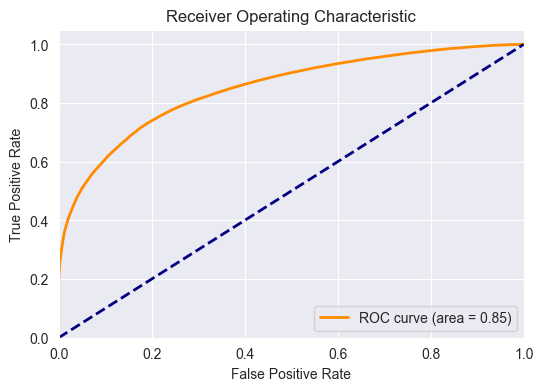

In [82]:
# Predict probabilities for the test data
y_scores = final_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()